### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('covid-19_case.csv')

In [3]:
df.head()

,ObservationDate,day_of_year,Confirmed,Recovered,Deaths
0,2020-01-22,22,555,28,17
1,2020-01-23,23,653,30,18
2,2020-01-24,24,941,36,26
3,2020-01-25,25,1438,39,42
4,2020-01-26,26,2118,52,56


In [4]:
df.tail()

,ObservationDate,day_of_year,Confirmed,Recovered,Deaths
64,2020-03-26,86,529591,122150,23970
65,2020-03-27,87,593291,130915,27198
66,2020-03-28,88,660706,139415,30652
67,2020-03-29,89,720117,149082,33925
68,2020-03-30,90,782365,164566,37582


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ObservationDate  69 non-null     object
 1   day_of_year      69 non-null     int64 
 2   Confirmed        69 non-null     int64 
 3   Recovered        69 non-null     int64 
 4   Deaths           69 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.8+ KB


<b>Splitting the data into Train and Test</b>

In [6]:
x = df[['day_of_year']]
y = np.log10(df['Confirmed'])

**Scatterplot antara day_of_year dengan jumlah Confirmed (sebelum transformasi log)**

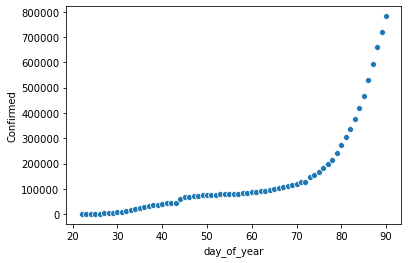

In [7]:
sns.scatterplot(x=df['day_of_year'], y=df['Confirmed']);

**Scatterplot antara day_of_year dengan jumlah Confirmed (setelah transformasi log)**

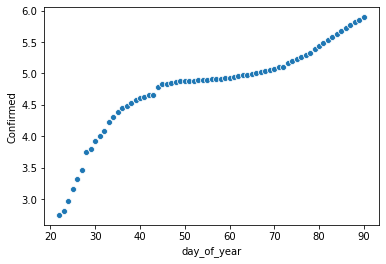

In [8]:
sns.scatterplot(x=df['day_of_year'], y=y);

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

<b>Fitting Model to Train Set</b>

In [10]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

<b>Predict the Test Set</b>

In [11]:
pred = regressor.predict(xtest)

In [12]:
pred

array([4.41879095, 3.72599203, 5.20606244, 3.85195547, 5.3950076 ,
       4.29282751, 4.04090063, 4.76519041, 5.11158987, 4.10388235,
       4.70220869, 4.00940977, 5.58395276, 3.88344633, 5.8673705 ,
       4.67071783, 5.52097104, 4.82817213, 5.48948018, 5.17457159,
       4.22984579])

<b>Visualize the training result</b>

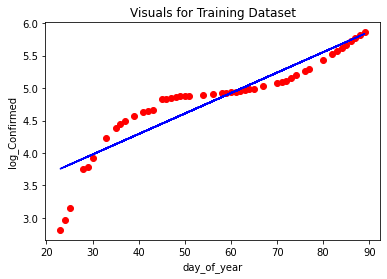

In [13]:
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("day_of_year")
plt.ylabel("log_Confirmed")
plt.show()

<b>Visualize the test result</b>

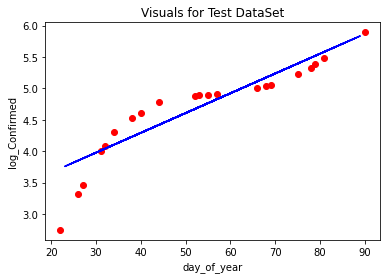

In [14]:
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("day_of_year")
plt.ylabel("log_Confirmed")
plt.show()

**Modelling Evaluation (Tanpa Regularization)**

In [15]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The Intercept
print('Intercept: \n', regressor.intercept_)

# MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: %.2f" % mean_squared_error(ytest, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(ytest, pred))

Coefficients: 
 [0.03149086]
Intercept: 
 3.0331931128699186
MSE: 0.10
RMSE: 0.31
MAE: 0.23
R2 score: 0.83


**Modelling Evaluation (Ridge Regularization)**

In [16]:
# Tulis solusi disini. inisialisasi object model dengan variable ridge_model
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [17]:
#Predicting the prices
pred = ridge_model.predict(xtest)

In [18]:
# The coefficients
print('Coefficients: \n', ridge_model.coef_)

# The Intercept
print('Intercept: \n', ridge_model.intercept_)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(ytest, pred))

# MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: %.2f" % mean_squared_error(ytest, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(ytest, pred))

Coefficients: 
 [0.03148915]
Intercept: 
 3.0332910717072408
Variance score: 0.83
MSE: 0.10
RMSE: 0.31
MAE: 0.23
R2 score: 0.83


## Kesimpulan
Telah dilakukan modelling evaluation tanpa dan dengan ridge regularization dan terlihat bahwa yang menghasilkan RMSE terendah (mendekati 0) dan R2 tertinggi (mendekati 1) adalah **modelling dengan ridge regularization**. </br>

Nilai RMSE menunjukkan penalti error sedangkan nilai R2 menunjukkan bahwa persentase sumbangan pengaruh variabel independen (day_of_year) yang mampu menjelaskan sebesar 83% variasi variabel dependen (Confirmed), sedangkan sisanya sebesar 17% dipengaruhi atau dijelaskan oleh variabel lain yang tidak dimasukkan dalam model. </br>

Lasso regularization tidak dilakukan karena performanya akan lebih baik dalam menurunkan variance yang mengandung banyak variabel yang tidak terlalu berkaitan/penting terhadap targetnya, sedangkan pada dataset ini, variabel day_of_year seharusnya merupakan variable yang berkaitan/penting terhadap targetnya, yaitu Confirmed sehingga lebih cocok dilakukan ridge regularization.

In [19]:
df2 = pd.DataFrame({'ObservationDate': ['2020-03-31','2020-04-01','2020-04-02','2020-04-03','2020-04-04','2020-04-05','2020-04-06'],'day_of_year':[91,92,93,94,95,96,97]})

In [20]:
df2

,ObservationDate,day_of_year
0,2020-03-31,91
1,2020-04-01,92
2,2020-04-02,93
3,2020-04-03,94
4,2020-04-04,95
5,2020-04-05,96
6,2020-04-06,97


In [21]:
xtest_new = df2[['day_of_year']]

In [22]:
pred = ridge_model.predict(xtest_new)

In [23]:
df2['Confirmed'] = (10**pred).round()

In [24]:
df2

,ObservationDate,day_of_year,Confirmed
0,2020-03-31,91,792143.0
1,2020-04-01,92,851712.0
2,2020-04-02,93,915760.0
3,2020-04-03,94,984625.0
4,2020-04-04,95,1058669.0
5,2020-04-05,96,1138281.0
6,2020-04-06,97,1223879.0


In [25]:
df2.to_csv('covid-19_case_prediction.csv', index=False)